<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >

#**Laboratorio: Detección de Outliers en Datos de Taxis de NYC**

---

##**Objetivo general**

Aplicar técnicas de detección de outliers sobre datos reales de viajes en taxi en la ciudad de Nueva York, analizando su fundamento teórico, forma de implementación y capacidad para identificar observaciones atípicas en un entorno multivariado.

## **1. Introducción**

Los valores atípicos (**outliers**) son observaciones que se alejan significativamente del patrón general de los datos. Su detección es crucial en tareas de análisis exploratorio, limpieza, modelado y monitoreo.

Este laboratorio aborda técnicas univariadas y multivariadas para detectar outliers, usando datos simulados basados en el NYC Taxi Dataset.

Se aplicarán cinco métodos:


- Z-score

- IQR (boxplot)

- DBSCAN

- LOF (Local Outlier Factor)

- Isolation Forest

### **Descargar Data**

Este conjunto de datos contiene información detallada sobre millones de viajes en taxi realizados en la ciudad de Nueva York durante el año 2018.

Es un dataset clásico para análisis de movilidad, detección de anomalías, pricing dinámico y aprendizaje automático.

Cada fila representa un viaje individual y las columnas incluyen:

  > **pickup_datetime y dropoff_datetime**: fechas y horas de inicio y fin del viaje.
  >
  > **trip_distance**: distancia total recorrida (en millas).
  >
  > **fare_amount**: monto base de la tarifa del viaje.
  >
  > **tip_amount**: monto de la propina.
  >
  > **payment_type**: tipo de pago (efectivo, tarjeta, etc.).
  >
  > **passenger_coun**: número de pasajeros.
  >
  > **pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude**: coordenadas geográficas del viaje.


**Fuente:** https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data?select=original_cleaned_nyc_taxi_data_2018.csv

In [10]:
%%capture
!pip3 install -q kagglehub

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neilclack/nyc-taxi-trip-data-google-public-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nyc-taxi-trip-data-google-public-data


In [12]:
import os

# Ver archivos descargados
os.listdir(path)


['original_cleaned_nyc_taxi_data_2018.csv',
 'taxi_trip_data.csv',
 'taxi_zone_geo.csv']

In [13]:
import pandas as pd
from pathlib import Path

df_path = Path(path).joinpath('original_cleaned_nyc_taxi_data_2018.csv')

df = pd.read_csv(df_path).sample(n=20_000, random_state=42)
df.head()


,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
3889775,4144169,7.40,1,Y,2,28.0,0.5,0.5,0.00,0.0,...,29.30,48,82,2018,3,27,1,0,2876.0,35.16
6908713,7472631,9.00,1,N,1,27.5,0.5,0.5,5.75,0.0,...,34.55,261,202,2018,12,3,0,22,2433.0,47.47
4149018,4425107,7.80,1,N,1,23.5,0.5,0.5,3.72,0.0,...,28.52,186,116,2018,10,17,2,3,3469.0,31.60
6816202,7366751,11.78,1,N,1,33.0,0.5,0.5,6.86,0.0,...,41.16,138,64,2018,5,4,4,23,1549.0,30.35
6140876,6614733,8.43,1,N,1,24.5,0.0,0.5,2.00,0.0,...,27.30,13,263,2018,11,12,0,19,2702.0,27.95


In [14]:
df.shape

(20000, 21)

## **2. Z-score**

### **2.1 Fundamento teórico**


El Z-score indica cuántas desviaciones estándar se encuentra un valor con respecto a la media.

Se define como:


<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/image015_fd507da112.jpg" alt="HTML5 Icon" width="400" height="200" >

Se considera outlier todo valor con ∣𝑍𝑖∣>3, bajo el supuesto de normalidad.

## **2.2 Implementación**

In [15]:
from scipy.stats import zscore

variables = ['fare_amount', 'trip_distance']
for var in variables:
    df[f"{var}_z"] = zscore(df[var])
    df[f"{var}_outlier_z"] = df[f"{var}_z"].abs() > 3


In [9]:
df.describe()

,Unnamed: 0,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,fare_amount_z,trip_distance_z
count,2.000000e+04,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,...,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18371.000000,2.000000e+04,2.000000e+04
mean,4.457024e+06,9.084793,1.15435,1.180350,31.676255,0.341925,0.487975,5.541449,2.188817,0.29997,...,147.350900,2018.0,6.446250,15.745250,2.935200,13.798700,2244.432100,40.604669,1.509903e-17,-1.408651e-16
std,2.628308e+06,5.084774,0.59552,0.407102,15.425753,0.562508,0.076604,4.591181,3.397472,0.00300,...,75.584544,0.0,3.447275,8.618409,1.925328,6.230419,5111.858963,20.294582,1.000025e+00,1.000025e+00
min,4.330000e+02,0.010000,1.00000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.310000,-2.052869e+00,-1.784744e+00
25%,2.163936e+06,6.000000,1.00000,1.000000,23.500000,0.000000,0.500000,2.000000,0.000000,0.30000,...,88.000000,2018.0,3.000000,9.000000,1.000000,9.000000,1406.000000,29.150000,-5.300526e-01,-6.066876e-01
50%,4.401288e+06,8.560000,1.00000,1.000000,29.000000,0.000000,0.500000,5.500000,0.000000,0.30000,...,142.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1846.000000,37.400000,-1.734970e-01,-1.032112e-01
75%,6.712147e+06,11.200000,1.00000,1.000000,37.000000,0.500000,0.500000,7.910000,5.760000,0.30000,...,229.000000,2018.0,10.000000,23.000000,4.000000,19.000000,2356.000000,48.670000,3.451292e-01,4.159989e-01
max,9.098575e+06,68.600000,5.00000,4.000000,325.000000,18.500000,0.500000,141.140000,57.800000,0.30000,...,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86360.000000,397.870000,1.901567e+01,1.170488e+01


##**3. IQR (Boxplot)**

### **3.1 Fundamento teórico**

El rango intercuartílico (IQR) se define como:

IQR=Q3−Q1

Donde:

> 𝑄1: percentil 25
>
> 𝑄3: percentil 75






<img src="https://www.simplypsychology.org/wp-content/uploads/boxplot-1.jpg" alt="HTML5 Icon" width="500" height="200" >

Se considera outlier todo valor fuera de:

(Q1−1.5⋅IQR, Q3+1.5⋅IQR)

### **3.2 Implementación**

In [16]:
def detect_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)

df['iqr_outlier_fare'] = detect_iqr_outliers(df['fare_amount'])


In [19]:
df['iqr_outlier_fare'].value_counts()

,count
iqr_outlier_fare,
False,18448
True,1552


## **4. DBSCAN**

### **4.1 Fundamento teórico**

**DBSCAN** detecta agrupamientos por densidad. Un punto se considera outlier si tiene menos de min_samples vecinos dentro de un radio eps.




<img src="https://mineracaodedados.wordpress.com/wp-content/uploads/2018/02/dbscan.png" alt="HTML5 Icon" width="500" height="300" >



### **4.2 Implementación**

In [20]:
# Reducimos el tamaño con muestreo aleatorio reproducible
df_sample = df[['trip_distance', 'fare_amount', 'trip_duration']].dropna()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X_scaled = StandardScaler().fit_transform(df_sample)

dbscan = DBSCAN(eps=1.2, min_samples=10)
df['dbscan_label'] = dbscan.fit_predict(X_scaled)
df['dbscan_outlier'] = df['dbscan_label'] == -1


In [21]:
df['dbscan_outlier'].value_counts()

,count
dbscan_outlier,
False,19952
True,48


## **5. LOF (Local Outlier Factor)**

### **5.1 Fundamento teórico**

LOF compara la densidad local de un punto con la de sus vecinos. Si un punto tiene baja densidad relativa, se considera un outlier.




<img src="https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_lof_novelty_detection_001.png" alt="HTML5 Icon" width="450" height="300" >

### **5.2 Implementación**

In [22]:
df_sample = df[['trip_distance', 'fare_amount', 'trip_duration']].dropna()

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df_sample)

In [23]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof = lof.fit(X_scaled)

df['lof_score'] = lof.fit_predict(X_scaled)
df['lof_outlier'] = df['lof_score'] == -1


In [24]:
df['lof_outlier'].value_counts()

,count
lof_outlier,
False,19800
True,200


## **6. Isolation Forest**

### **6.1 Fundamento teórico**

Isolation Forest aísla puntos de forma aleatoria. Los outliers, al estar más aislados, requieren menos divisiones. Eso se traduce en una menor profundidad media del árbol.



<img src="https://media.licdn.com/dms/image/v2/D4D08AQEiI2518F5qhg/croft-frontend-shrinkToFit1024/croft-frontend-shrinkToFit1024/0/1700684114746?e=2147483647&v=beta&t=w-7UygZ_NYGxA30dvc6GbDc5OSQgq1ASAdSukZ8ENFY" alt="HTML5 Icon" width="500" height="280" >

### **6.2 Implementación**

In [25]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['if_outlier'] = iso.fit_predict(X_scaled) == -1


In [26]:
df['if_outlier'].value_counts()

,count
if_outlier,
False,19800
True,200


## **7. Análisis Visual y Cuantitativo**

### **7.1 Boxplots para Z-score e IQR**

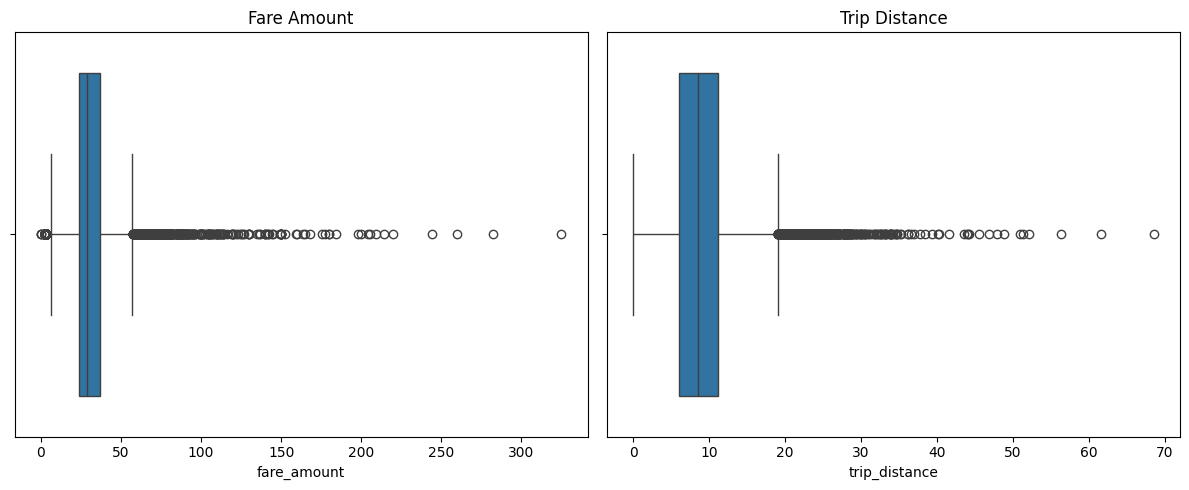

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x="fare_amount", ax=axes[0])
axes[0].set_title("Fare Amount")
sns.boxplot(data=df, x="trip_distance", ax=axes[1])
axes[1].set_title("Trip Distance")
plt.tight_layout()
plt.show()


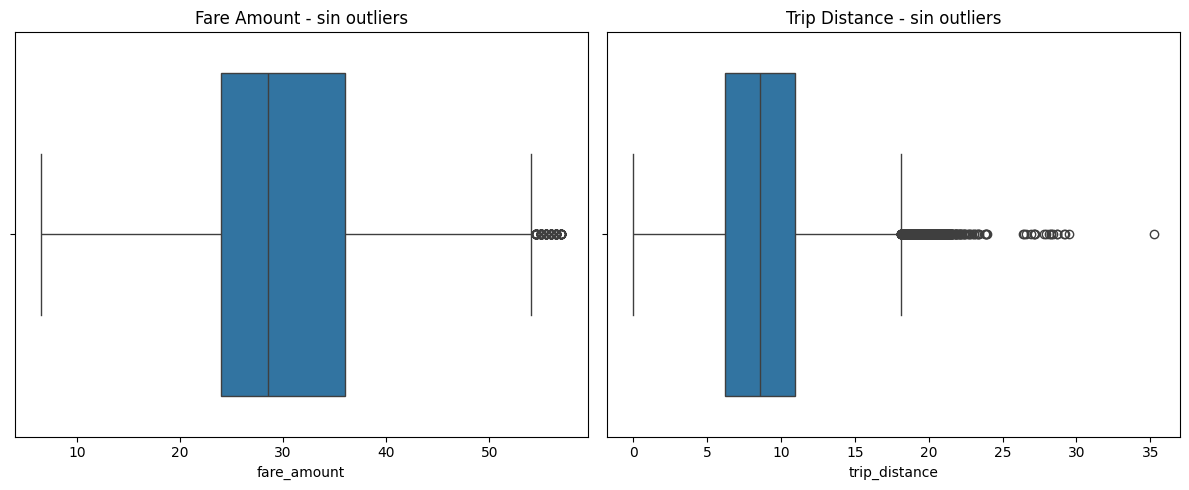

In [28]:
# Excluir outliers antes de graficar
df_no_outliers = df[~df['iqr_outlier_fare']]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df_no_outliers, x="fare_amount", ax=axes[0])
axes[0].set_title("Fare Amount - sin outliers")

sns.boxplot(data=df_no_outliers, x="trip_distance", ax=axes[1])
axes[1].set_title("Trip Distance - sin outliers")

plt.tight_layout()
plt.show()


### **7.2 Conteo de outliers por técnica**

In [29]:
print("Z-score Fare:", df["fare_amount_outlier_z"].sum())
print("Z-score Distance:", df["trip_distance_outlier_z"].sum())
print("IQR Fare:", df["iqr_outlier_fare"].sum())
print("DBSCAN:", df["dbscan_outlier"].sum())
print("LOF:", df["lof_outlier"].sum())
print("Isolation Forest:", df["if_outlier"].sum())


Z-score Fare: 223
Z-score Distance: 191
IQR Fare: 1552
DBSCAN: 48
LOF: 200
Isolation Forest: 200


## **8. Visualización de técnicas multivariadas**


### **8.1 DBSCAN**


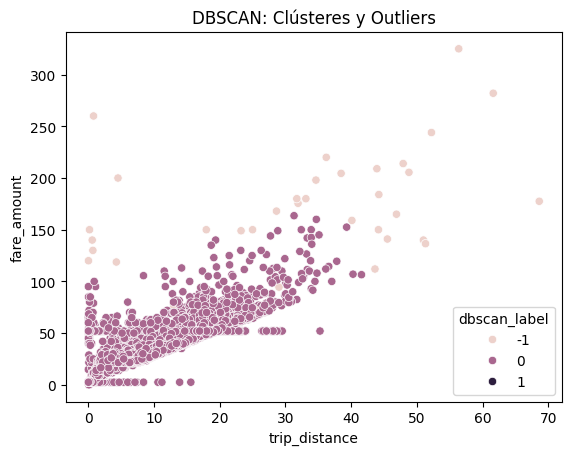

In [30]:
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", hue=df["dbscan_label"])
plt.title("DBSCAN: Clústeres y Outliers")
plt.show()


### **8.2 LOF**

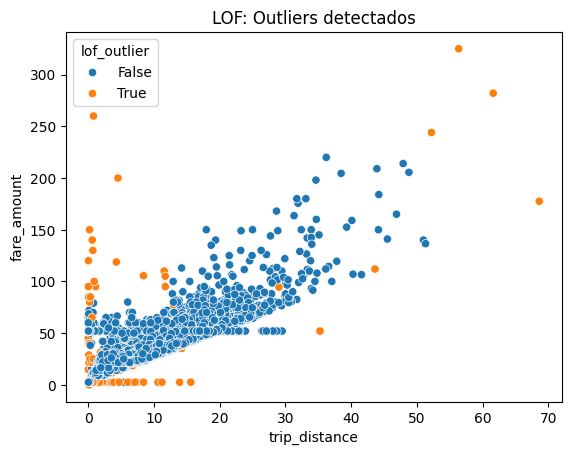

In [31]:
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", hue=df["lof_outlier"])
plt.title("LOF: Outliers detectados")
plt.show()


### **8.3 Isolation Forest**

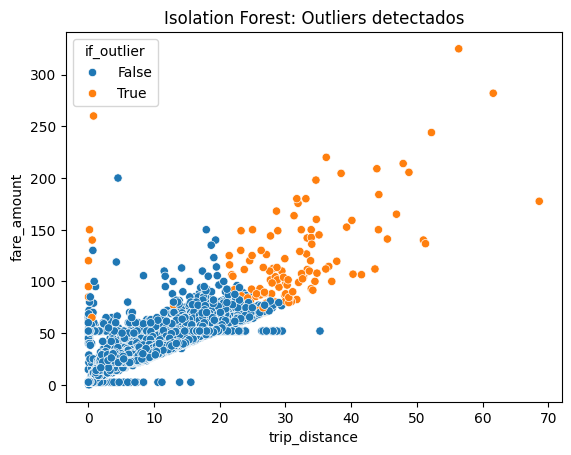

In [32]:
sns.scatterplot(data=df, x="trip_distance", y="fare_amount", hue=df["if_outlier"])
plt.title("Isolation Forest: Outliers detectados")
plt.show()


## **9. Comparación y análisis cruzado**

### **9.1 Conteo general**

In [33]:
outlier_cols = ['fare_amount_outlier_z', 'iqr_outlier_fare', 'dbscan_outlier', 'lof_outlier', 'if_outlier']
df[outlier_cols].sum()


,0
fare_amount_outlier_z,223
iqr_outlier_fare,1552
dbscan_outlier,48
lof_outlier,200
if_outlier,200


### **9.2 Coincidencias entre métodos**

In [34]:
df["lof_if"] = df["lof_outlier"] & df["if_outlier"]
df["z_iqr"] = df["fare_amount_outlier_z"] & df["iqr_outlier_fare"]

print("LOF & IF:", df["lof_if"].sum())
print("Z-score & IQR:", df["z_iqr"].sum())


LOF & IF: 26
Z-score & IQR: 223


### **9.3 Outliers detectados por múltiples métodos**

In [35]:
df["outlier_count"] = df[outlier_cols].sum(axis=1)
outliers_multi = df[df["outlier_count"] >= 3]
print("Outliers detectados por 3+ técnicas:", len(outliers_multi))


Outliers detectados por 3+ técnicas: 140


In [36]:
outliers_multi.head()

,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,trip_distance_outlier_z,iqr_outlier_fare,dbscan_label,dbscan_outlier,lof_score,lof_outlier,if_outlier,lof_if,z_iqr,outlier_count
7794365,8499359,28.10,4,N,1,112.5,1.0,0.5,22.85,0.00,...,True,True,0,False,1,False,True,False,True,3
1474721,1541476,45.50,3,N,1,141.0,0.0,0.0,20.00,18.26,...,True,True,-1,True,1,False,True,False,True,4
1521463,1590363,24.70,3,N,1,86.0,0.0,0.0,21.00,18.70,...,True,True,0,False,1,False,True,False,True,3
7098413,7690874,43.61,1,N,1,112.0,0.5,0.5,34.22,57.80,...,True,True,-1,True,-1,True,True,True,True,5
196654,202650,1.11,5,N,1,95.0,0.0,0.0,10.00,0.00,...,False,True,0,False,-1,True,False,False,True,3


## **10. Conclusión**

Las técnicas univariadas como Z-score e IQR son simples pero limitadas en escenarios multivariados o distribuciones sesgadas. En cambio, técnicas como DBSCAN, LOF e Isolation Forest permiten detectar patrones más complejos, aunque requieren más configuración y análisis visual.

La detección de outliers no debe usarse de forma ciega. Debe combinarse con conocimiento del dominio, validación visual, y análisis de impacto en modelos posteriores. Una observación extrema no siempre es un error: puede ser una oportunidad.

---

## **Trabajo**

**Visualización comparativa de técnicas univariadas:**

Programa una función que grafique lado a lado los boxplots de fare_amount con y sin outliers (según IQR). ¿Cómo cambia la forma de la distribución al remover los outliers? ¿Cuántos valores fueron eliminados?

**Exploración de inconsistencias multivariadas:**

Escribe código para detectar viajes en los que la duración sea muy corta pero la tarifa total muy alta. Usa reglas lógicas personalizadas o una técnica no supervisada como Isolation Forest. ¿Cuántos casos detectas? ¿Qué podría explicarlos?

**Matriz de coincidencias entre técnicas de outliers:**

Crea una matriz de correlación binaria entre los métodos Z-score, IQR, DBSCAN, LOF e Isolation Forest (por columnas booleanas de outliers). ¿Qué técnicas coinciden más? Visualízalo con un heatmap.

**Función generalizada para aplicar DBSCAN:**

Implementa una función parametrizable aplicar_dbscan(df, variables, eps, min_samples) que permita probar distintas configuraciones de eps y min_samples sobre subconjuntos de variables. Evalúa cómo cambia la cantidad de outliers detectados.

**Perfil detallado de un outlier extremo:**

Elige una observación detectada como outlier por al menos 3 técnicas. Programa una función que grafique su posición relativa en cada una de las variables analizadas (fare_amount, trip_distance, tip_amount, etc.) comparada con el resto de los datos.

---

# Gracias por completar este laboratorio!

---


# Resolucion

**Visualización comparativa de técnicas univariadas:**

Programa una función que grafique lado a lado los boxplots de fare_amount con y sin outliers (según IQR). ¿Cómo cambia la forma de la distribución al remover los outliers? ¿Cuántos valores fueron eliminados?

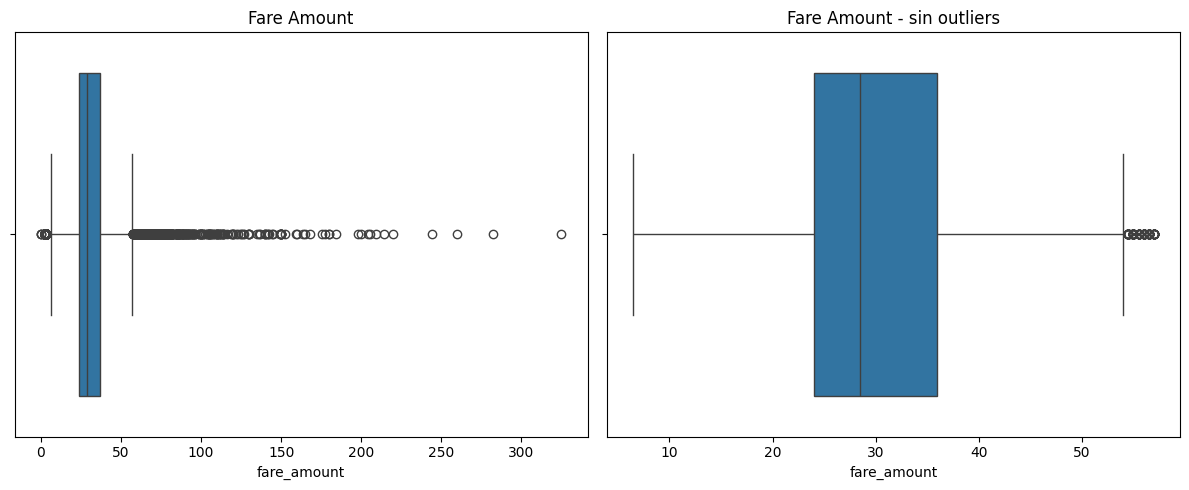

Numero de observaciones: 20000
Numero de observaciones sin outliers: 18448
Numero de observaciones eliminadas: 1552
Stats de fare amount:
 count    20000.000000
mean        31.676255
std         15.425753
min          0.010000
25%         23.500000
50%         29.000000
75%         37.000000
max        325.000000
Name: fare_amount, dtype: float64
Stats de fare amount sin outliers:
 count    18448.000000
mean        30.770273
std          9.837227
min          6.500000
25%         24.000000
50%         28.500000
75%         36.000000
max         57.000000
Name: fare_amount, dtype: float64


In [49]:
def plot_fare_amount_boxplots(df):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  sns.boxplot(data=df, x="fare_amount", ax=axes[0])
  axes[0].set_title("Fare Amount")
  df_no_outliers = df[~df['iqr_outlier_fare']]
  sns.boxplot(data=df_no_outliers, x="fare_amount", ax=axes[1])
  axes[1].set_title("Fare Amount - sin outliers")
  plt.tight_layout()
  plt.show()
  print('Numero de observaciones:',df.shape[0])
  print('Numero de observaciones sin outliers:',df_no_outliers.shape[0])
  print('Numero de observaciones eliminadas:',df.shape[0]-df_no_outliers.shape[0])
  print('Stats de fare amount:\n',df['fare_amount'].describe())
  print('Stats de fare amount sin outliers:\n',df_no_outliers['fare_amount'].describe())

plot_fare_amount_boxplots(df)

Como se puede ver, los stats de desviacion estandar y los cuartiles cambian significativamente, mostrando una distribucion diferente y mas comprimida en las dos colas.

**Exploración de inconsistencias multivariadas:**

Escribe código para detectar viajes en los que la duración sea muy corta pero la tarifa total muy alta. Usa reglas lógicas personalizadas o una técnica no supervisada como Isolation Forest. ¿Cuántos casos detectas? ¿Qué podría explicarlos?

In [52]:
# Reglas personalizadas de percentiles para ver outliers
short_duration_threshold = df['trip_duration'].quantile(0.05) # 5th percentil
high_fare_threshold = df['fare_amount'].quantile(0.95) # 95th percentil

# Outliers cumplirian las 2 condiciones
inconsistent_trips_rules = df[(df['trip_duration'] < short_duration_threshold) & (df['fare_amount'] > high_fare_threshold)]

print(f"Numero de viajes atipicos obtenidos segun reglas: {len(inconsistent_trips_rules)}")
display(inconsistent_trips_rules.head())

Numero de viajes atipicos obtenidos segun reglas: 50


,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,iqr_outlier_fare,dbscan_label,dbscan_outlier,lof_score,lof_outlier,if_outlier,lof_if,z_iqr,outlier_count,inconsistency_outlier_iso
1521463,1590363,24.70,3,N,1,86.0,0.0,0.0,21.00,18.7,...,True,0,False,1,False,True,False,True,3,True
4362819,4658578,14.78,3,N,1,58.0,0.0,0.0,17.70,12.5,...,True,0,False,1,False,False,False,False,1,True
6106736,6577376,21.90,1,N,4,65.0,0.0,0.5,0.00,0.0,...,True,0,False,1,False,False,False,False,1,True
6013522,6470870,26.79,1,N,1,70.0,0.0,0.5,14.16,0.0,...,True,0,False,1,False,True,False,False,2,True
4322283,4614263,14.97,3,N,1,59.0,0.0,0.0,17.45,10.5,...,True,0,False,1,False,False,False,False,1,True


In [54]:
# Isolation Forest en el trip_duration y fare_amount

X_inconsistency = df[['trip_duration', 'fare_amount']].dropna()

iso_inconsistency = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
inconsistency_outliers_iso = iso_inconsistency.fit_predict(X_inconsistency) == -1

df['inconsistency_outlier_iso'] = pd.Series(inconsistency_outliers_iso, index=X_inconsistency.index)

print(f"Numero de viajes atipicos encontrados por Isolation Forest: {df['inconsistency_outlier_iso'].sum()}")
display(df[df['inconsistency_outlier_iso']].head())

Numero de viajes atipicos encontrados por Isolation Forest: 3447


,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,iqr_outlier_fare,dbscan_label,dbscan_outlier,lof_score,lof_outlier,if_outlier,lof_if,z_iqr,outlier_count,inconsistency_outlier_iso
5369334,5754216,10.25,1,N,1,38.0,1.0,0.5,9.11,5.76,...,False,0,False,1,False,False,False,False,0,True
3311658,3512914,4.00,1,N,1,16.5,0.5,0.5,5.30,0.00,...,False,0,False,1,False,False,False,False,0,True
7491842,8146736,8.38,1,N,1,26.5,0.0,0.5,5.46,0.00,...,False,0,False,1,False,False,False,False,0,True
5608090,6020966,0.02,1,N,2,2.5,0.0,0.5,0.00,0.00,...,True,0,False,1,False,False,False,False,1,True
5661656,6081837,10.17,1,N,1,36.5,0.0,0.5,0.00,0.00,...,False,0,False,1,False,False,False,False,0,True


En el caso de las reglas logicas, se tiene que saber bien el contexto del negocio para dar reglas que realmente capturen los valores atipicos, pero la interpretabilidad del metodo para llegar al resultado es 100% entendible y reproducible.

En el caso del Isolation Forest, se mejora mucho la obtencion de valores atipicos y el procesamiento en base a patrones ocultos, a costa de la interpretabilidad disminuida de las reglas o procedimientos usados para llegar a ese nivel.

**Matriz de coincidencias entre técnicas de outliers:**

Crea una matriz de correlación binaria entre los métodos Z-score, IQR, DBSCAN, LOF e Isolation Forest (por columnas booleanas de outliers). ¿Qué técnicas coinciden más? Visualízalo con un heatmap.

Matriz de coincidencias entre técnicas de outliers:


,fare_amount_outlier_z,iqr_outlier_fare,dbscan_outlier,lof_outlier,if_outlier
fare_amount_outlier_z,1.000000,0.366101,0.315934,0.099400,0.549260
iqr_outlier_fare,0.366101,1.000000,0.123272,0.124869,0.218783
dbscan_outlier,0.315934,0.123272,1.000000,0.282629,0.354519
lof_outlier,0.099400,0.124869,0.282629,1.000000,0.121212
if_outlier,0.549260,0.218783,0.354519,0.121212,1.000000


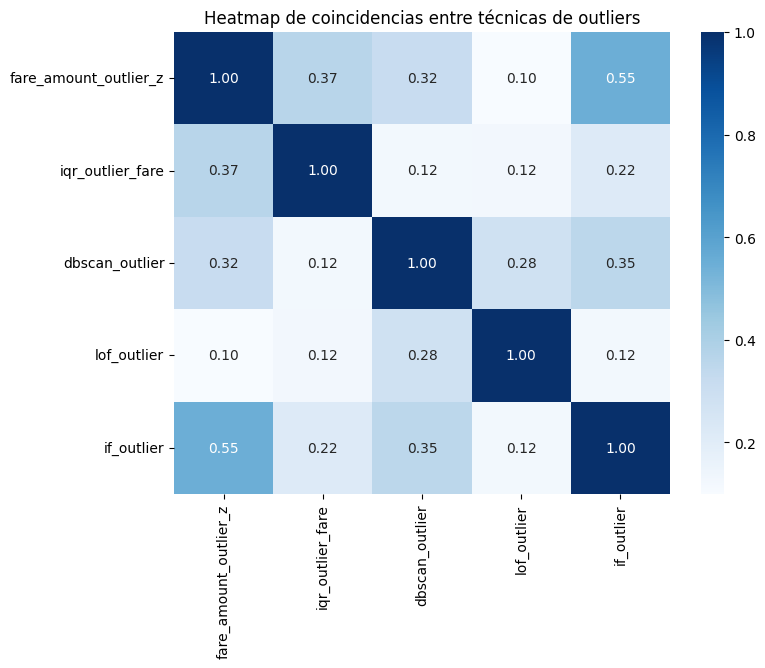

In [56]:
outlier_cols = ['fare_amount_outlier_z', 'iqr_outlier_fare', 'dbscan_outlier', 'lof_outlier', 'if_outlier']

# Matriz binaria en donde se convierten los verdaderos y falsos en 0 y 1 para la correlacion.
outlier_matrix = df[outlier_cols].astype(int)

coincidence_matrix = outlier_matrix.corr()

# Printeamos la matriz de coincidencia
print("Matriz de coincidencias entre técnicas de outliers:")
display(coincidence_matrix)

# La visualizamos como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(coincidence_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap de coincidencias entre técnicas de outliers")
plt.show()

Como se puede apreciar, solo existe una combinacion con un nivel de correlacion mas alto que todos los demas: el Isolation Forest con el de Outliers usando el Z-value (0.55). Por otro lado, el metodo que tiene menos correlacion con los demas es el LOF, por lo que es probable que este capturando o utilizando otras reglas para clasificar como outliers que no se repliquen bien en los demas metodos.

**Función generalizada para aplicar DBSCAN:**

Implementa una función parametrizable aplicar_dbscan(df, variables, eps, min_samples) que permita probar distintas configuraciones de eps y min_samples sobre subconjuntos de variables. Evalúa cómo cambia la cantidad de outliers detectados.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def aplicar_dbscan(df, variables, eps, min_samples):
  df_subset = df[variables].dropna()
  if df_subset.empty:
      return 0
  X_scaled = StandardScaler().fit_transform(df_subset)
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  labels = dbscan.fit_predict(X_scaled)
  return (labels == -1).sum()

In [65]:
# Variables usadas
variables_to_use = ['trip_distance', 'fare_amount', 'trip_duration']
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

results={}
print("Evaluacion parametrica:")
for eps in eps_values:
  for min_samples in min_samples_values:
    num_outliers = aplicar_dbscan(df, variables_to_use, eps, min_samples)
    results[(eps, min_samples)] = num_outliers
    print(f"  eps={eps}, min_samples={min_samples}: {num_outliers} outliers")

Evaluacion parametrica:
  eps=0.5, min_samples=5: 109 outliers
  eps=0.5, min_samples=10: 143 outliers
  eps=0.5, min_samples=15: 179 outliers
  eps=1.0, min_samples=5: 42 outliers
  eps=1.0, min_samples=10: 53 outliers
  eps=1.0, min_samples=15: 77 outliers
  eps=1.5, min_samples=5: 22 outliers
  eps=1.5, min_samples=10: 34 outliers
  eps=1.5, min_samples=15: 42 outliers


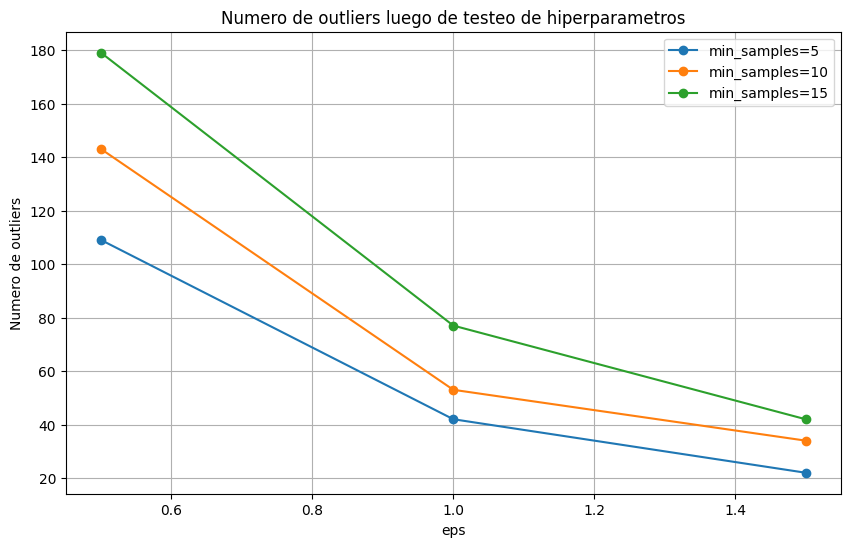

In [69]:
# Transformando a pandas para plotearlo
results_df = pd.DataFrame(list(results.items()), columns=['params', 'outlier_num'])
results_df['eps'] = results_df['params'].apply(lambda x: x[0])
results_df['min_samples'] = results_df['params'].apply(lambda x: x[1])

plt.figure(figsize=(10, 6))
for min_samples in sorted(results_df['min_samples'].unique()):
    subset_df = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset_df['eps'], subset_df['outlier_num'], marker='o', linestyle='-', label=f'min_samples={min_samples}')

plt.xlabel("eps")
plt.ylabel("Numero de outliers")
plt.title("Numero de outliers luego de testeo de hiperparametros")
plt.legend()
plt.grid(True)
plt.show()

**Perfil detallado de un outlier extremo:**

Elige una observación detectada como outlier por al menos 3 técnicas. Programa una función que grafique su posición relativa en cada una de las variables analizadas (fare_amount, trip_distance, tip_amount, etc.) comparada con el resto de los datos.

Observacion especifica:


,7794365
Unnamed: 0,8499359
trip_distance,28.1
rate_code,4
store_and_fwd_flag,N
payment_type,1
fare_amount,112.5
extra,1.0
mta_tax,0.5
tip_amount,22.85
tolls_amount,0.0


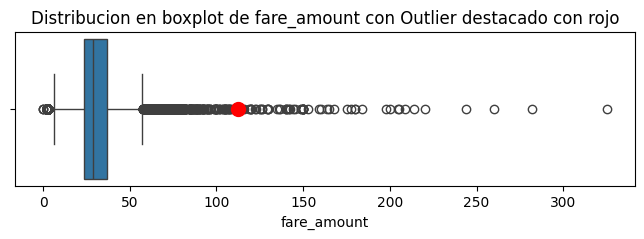

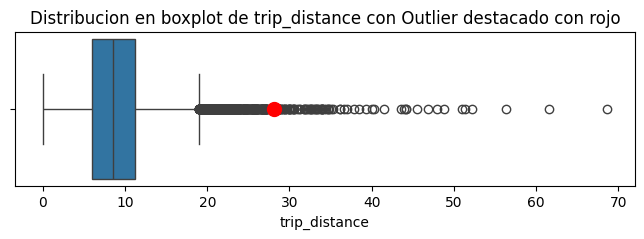

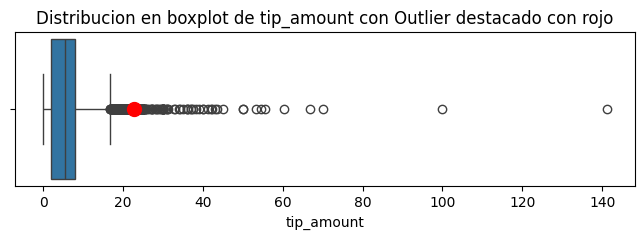

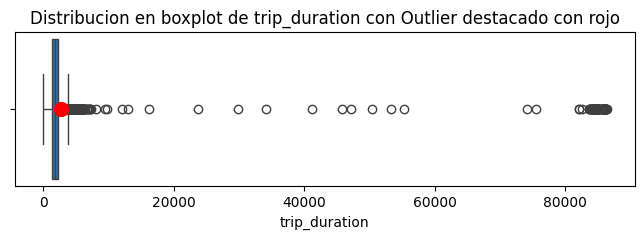

In [70]:
# Seleccionar el primer outlier obtenido con 3 tecnicas. Usare el df previamente filtrado de outliers.
outlier_to_profile = outliers_multi.iloc[0]

print("Observacion especifica:")
display(outlier_to_profile)

variables_to_profile = ['fare_amount', 'trip_distance', 'tip_amount', 'trip_duration']

# Se visualiza el outlier en relacion a la demas info.
for var in variables_to_profile:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[var])
    plt.scatter(outlier_to_profile[var], 0, color='red', s=100, zorder=5)
    plt.title(f"Distribucion en boxplot de {var} con Outlier destacado con rojo")
    plt.show()